In [22]:
import pandas as pd

# Load dataset
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

# Question 1: Display data types of each column
df.dtypes

,0
Unnamed: 0,int64
id,int64
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64


In [23]:
# Question 2: Drop columns and display statistical summary

# Drop columns and display statistical summary
df.drop(["id", "Unnamed: 0"], axis=1, inplace = True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [25]:
# Question 3: Count unique floor values

# Count unique floor values
floor_counts = df['floors'].value_counts().to_frame()
floor_counts

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


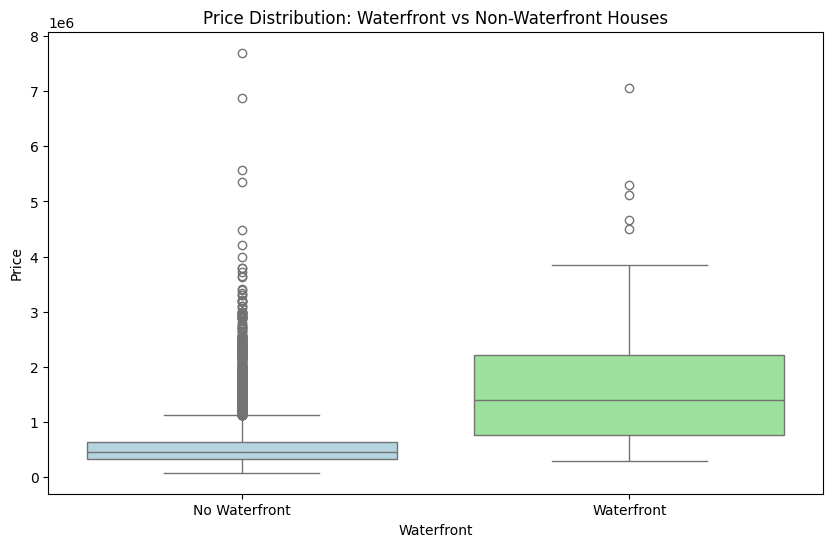

In [40]:
# Question 4: Boxplot of price for waterfront vs non-waterfront houses

import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplot with two colors
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df,
            hue='waterfront', palette=['lightblue', 'lightgreen'], legend=False)

# Set title and labels
plt.title('Price Distribution: Waterfront vs Non-Waterfront Houses')
plt.xlabel('Waterfront')
plt.ylabel('Price')

# Customize x-axis labels
plt.xticks([0, 1], ['No Waterfront', 'Waterfront'])

# Display plot
plt.show()

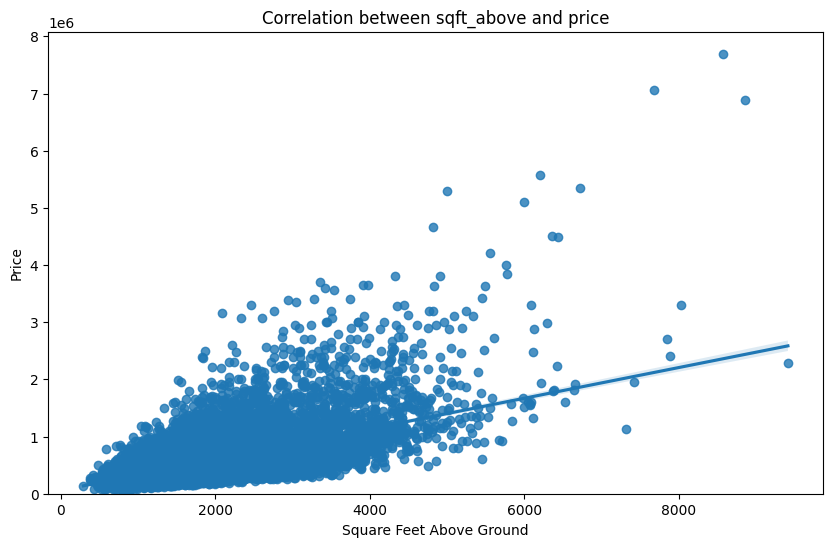

In [28]:
# Question 5: Correlation between sqft_above and price

# Create regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x="sqft_above", y="price", data=df)

# Set title and labels
plt.title('Correlation between sqft_above and price')
plt.xlabel('Square Feet Above Ground')
plt.ylabel('Price')

# Set y-axis to start from 0
plt.ylim(0,)

# Display plot
plt.show()

In [29]:
# Question 6: Linear regression with sqft_living

# Prepare data
X = df[['sqft_living']]
Y = df['price']

# Create and fit regression model
lm = LinearRegression()
lm.fit(X, Y)

# Calculate R^2 score
r2 = lm.score(X, Y)
print(f"R^2: {r2}")

R^2: 0.4928532179037931


In [30]:
# Question 7: Multiple linear regression with handling of missing values

from sklearn.impute import SimpleImputer

# Define features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Create feature matrix X and target vector y
X = df[features]
y = df['price']

# Create imputer to fill missing values with mean
imputer = SimpleImputer(strategy='mean')

# Fit imputer and transform X
X_imputed = imputer.fit_transform(X)

# Create and fit linear regression model
lm = LinearRegression()
lm.fit(X_imputed, y)

# Calculate R^2 score
r2 = lm.score(X_imputed, y)
print(f"R^2: {r2}")

R^2: 0.6576861682430691


In [34]:
# Question 8: Pipeline with imputation, scaling, polynomial transform, and linear regression

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# Define features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
Y = df['price']

# Create pipeline with imputer
Input = [
    ('imputer', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
]
pipe = Pipeline(Input)

# Fit pipeline and calculate R^2
pipe.fit(X, Y)
r2 = pipe.score(X, Y)
print(f"R^2: {r2}")

R^2: 0.7513388843959332


In [36]:
# Question 9: Ridge regression with imputation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import numpy as np

# Define features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
Y = df['price']

# Create and fit imputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split data after imputation
x_train, x_test, y_train, y_test = train_test_split(X_imputed, Y, test_size=0.15, random_state=1)

# Create and fit Ridge model
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)

# Calculate R^2 score
r2 = RidgeModel.score(x_test, y_test)
print(f"R^2: {r2}")

R^2: 0.6478759163939132


In [38]:
# Question 10: Second-order polynomial transform with Ridge regression

# Define features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
Y = df['price']

# Create and fit imputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split data after imputation
x_train, x_test, y_train, y_test = train_test_split(X_imputed, Y, test_size=0.15, random_state=1)

# Create and apply polynomial features
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)

# Create and fit Ridge model
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr, y_train)

# Calculate R^2 score
r2 = RidgeModel.score(x_test_pr, y_test)
print(f"R^2: {r2}")

R^2: 0.7002744267906067
